### Isotope Data Sets
* Dry Creek
* Mores Creek
* Treasure Valley
#### Water Year 22

In [1]:
from pathlib import Path
sys.path.append(str(Path().resolve().parent / 'Scripts'))
from packages import *
import colors

### Dry Creek Isotope Dataset

In [2]:
import read_dcew
dc = read_dcew.read_and_process()
dc.tail(2)

,Sample_Name,Site_ID,Collection_Date,D_2H,D_2H_StDev,D_18O,D_18O_StDev,Site_no,Type,elevation
240,2000,DC-MR-2000,2023-11-20,-119.838323,1.78,-15.657695,-7.176149,MR,DC,1062
241,2002,DC-UR-2002,2023-11-20,-120.234697,1.79,-15.681134,-7.223109,UR,DC,1064


In [3]:
dc['Site_no'].unique()

array(['C1E', 'LR', 'MR', 'UR', 'LG', 'C2E', 'C2M', 'C1WSP', 'C1W'],
      dtype=object)

[Text(0.5, 0, ' DCEW Sites'), Text(0, 0.5, '$\\mathregular{D^{18}}$O')]

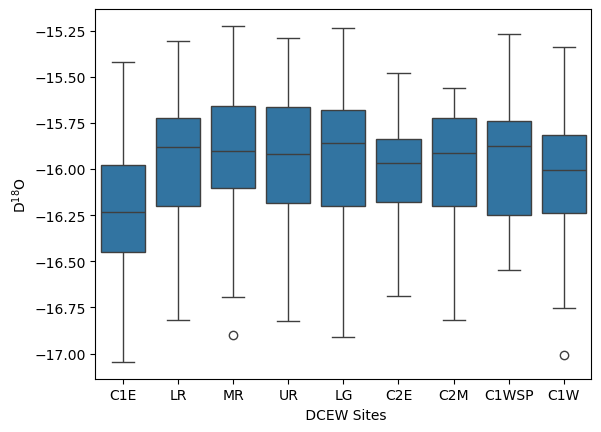

In [4]:
#box plot of DCEW sites, not ordered
hue_order =  ['LG','LR','MR','UR','C2M','C2E','C1E','C1W', 'C1WSP'] 
sns.boxplot(data=pd.concat([dc]),
            x='Site_no', y='D_18O',hue_order=hue_order).set(xlabel=r' DCEW Sites',ylabel=r'$\mathregular{D^{18}}$O')

## MCW Isotope Dataset

In [5]:
import read_mcw
df = read_mcw.read_and_process()
df.tail(2)

,Sample Name,Site_ID,Collection_Date,D_2H,D_2H_StDev,D_18O,D_18O_StDev,Type,Site_no,D_18O_Rain,D_18O_Snow,D_18O_MC,D_18O_BC,D_2H_Rain,D_2H_Snow,D_18O_std_Rain,D_18O_std_Snow,D_18O_StDev_Precip,D_18O_Precip,D_2H_Precip
199,202,BC,2023-11-03,-123.560521,0.748,-16.237848,0.0845,BC,NaN,NaN,NaN,NaN,-16.237848,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200,203,MC,2023-11-03,-120.455541,1.060,-16.033286,0.1700,MC,NaN,NaN,NaN,-16.033286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#local isotope dataset from 2013
dd = pd.read_csv('../Data/16.DCEW_Danny_Precip_Isotopes.csv',parse_dates = [1])
dd.rename(columns={'Site_ID': 'Type'}, inplace=True)
dd.head()

,Type,Collection_Date,D_2H_Precip,D_18O_Precip
0,Lower Deer Point,2009-11-13,-150.39,-19.06
1,Lower Deer Point,2010-01-13,-84.22,-11.37
2,Lower Deer Point,2010-01-20,-131.73,-15.63
3,Lower Deer Point,2010-01-20,-136.24,-17.27
4,Lower Deer Point,2010-03-29,-118.34,-15.84


## Stream Isotopes
###  MCW & DCEW 

Std and Averages for Precip and Stream Isotopes

In [7]:
# D18O Mean Values for rain, snow, streams, total 
means = df['D_18O'].mean()
print('D_18O Mean =', means) 
# BC =  -16.708
# MC =  -16.467
# RC =  -11.985
# IB = -19.1158 

D_18O Mean = -15.719611671641792


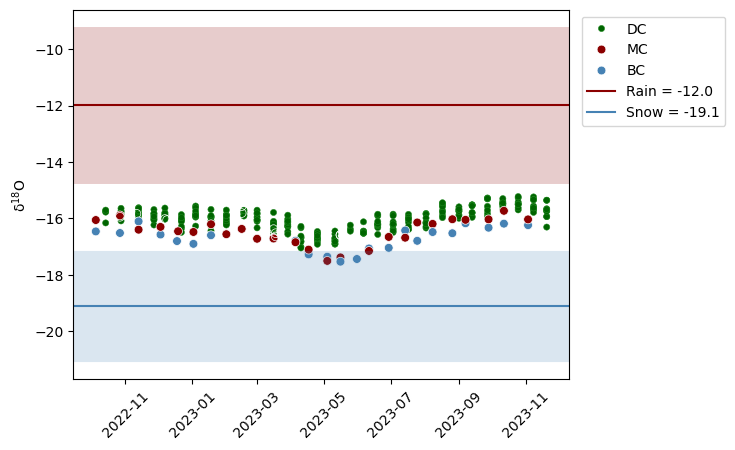

In [8]:
#Side by side view of DCEW & MCW
#set axis limits -22.5, -10
hue_order = ['MC', 'BC']

# DCEW
sns.scatterplot(x="Collection_Date", y="D_18O", data=dc, hue="Type",
                palette=['darkgreen'], edgecolor='forestgreen',s=20).set(xlabel='')
sns.scatterplot(x="Collection_Date", y="D_18O", data=df, hue="Type", hue_order=hue_order,palette=['darkred','steelblue'], s=40).set(xlabel='')
                
#RAIN Average MCW
#add average for rc_avg
plt.axhline(y=-11.99, color='darkred', linestyle='-',label='Rain = -12.0') 
#rain std = 2.9
# (-14.89,-9.09)
plt.axhline(y=-11.99, color='darkred', linestyle='-',linewidth = '113',alpha=0.2)
plt.xticks(rotation=45)
plt.ylim(-21.7, -8.6)

#SNOW Average MCW
#add average for ib_avg
plt.axhline(y=-19.12, color='steelblue', linestyle='-', label='Snow = -19.1')
plt.axhline(y=-19.12, color='steelblue', linestyle='-', linewidth = '80', alpha=0.2)
#snow std = 2.25 
# (-21.37,-16.87)
plt.ylabel(r'$\mathregular{δ^{18}}$O')
plt.legend(loc='upper center', bbox_to_anchor=(1.17, 1));

### Mores Creek & Banncok Creek Stream Averages

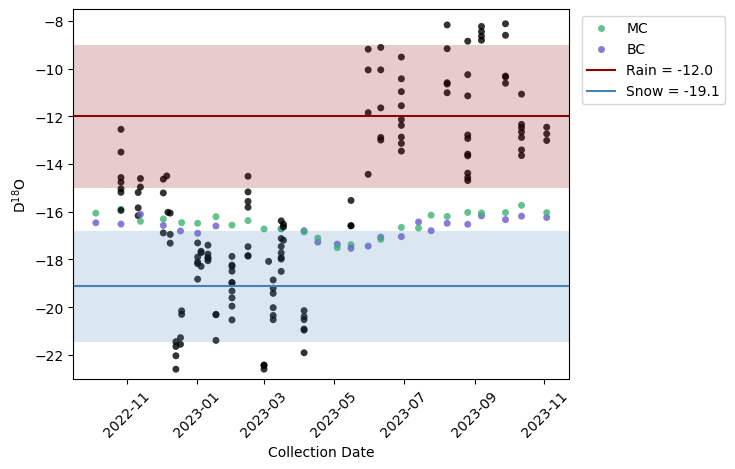

In [9]:
#Mores Creek Stream data compared to rain v snow averages
hue_order = ['MC', 'BC']

sns.scatterplot(x='Collection_Date', y='D_18O', data=df,
                hue='Type',hue_order=hue_order, linewidth=0,s=25, palette=['mediumseagreen','slateblue'],alpha=0.8).set(ylabel=r'$\mathregular{D^{18}}$O', xlabel='Collection Date')

#RAIN
#add average for rc_avg
plt.axhline(y=-11.99, color='darkred', linestyle='-',label='Rain = -12.0') 
#rain std = 2.9
# (-14.89,-9.09)
plt.axhline(y=-11.99, color='darkred', linestyle='-',linewidth = '103',alpha=0.2) 

#SNOW
#add average for ib_avg
plt.axhline(y=-19.12, color='steelblue', linestyle='-', label='Snow = -19.1')
#snow std = 2.25 
# (-21.37,-16.87)
plt.axhline(y=-19.12, color='steelblue', linestyle='-', linewidth = '80', alpha=0.2)

plt.xticks(rotation=45)
plt.ylim(-23,-7.5)
legend = plt.legend(loc='upper center', bbox_to_anchor=(1.17, 1));

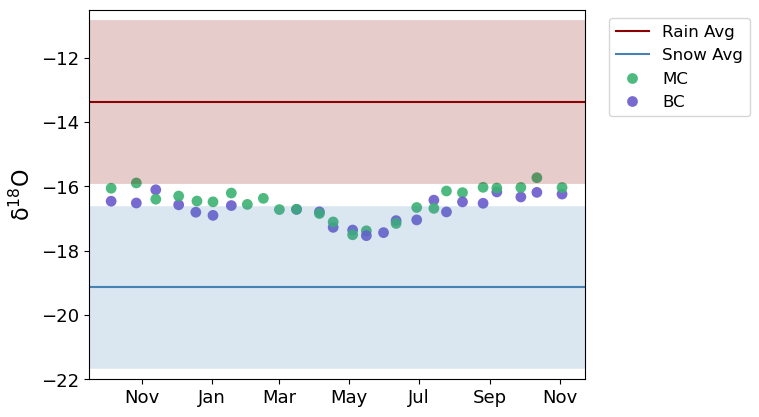

In [10]:
#RAIN
#add average for rc_avg
plt.axhline(y=-13.36, color='darkred', linestyle='-',linewidth = '118',alpha=0.2)
plt.axhline(y=-13.36, color='darkred', linestyle='-',label='Rain Avg')
#SNOW
#add average for ib_avg
plt.axhline(y=-19.12, color='steelblue', linestyle='-', label='Snow Avg') 
plt.axhline(y=-19.12, color='steelblue', linestyle='-', linewidth = '117', alpha=0.2)

stream = ['MC', 'BC']

# Filter the DataFrame for the specified streams
filtered_df = df[df['Type'].isin(stream)]
ax = sns.scatterplot(x='Collection_Date', y='D_18O', data=filtered_df,
                hue='Type',hue_order=stream, palette=['mediumseagreen','slateblue'], alpha=0.9,s=60, edgecolor='None')

# Set y and x-label fontsize
ax.set_ylabel(r'$\mathregular{\delta^{18}O}$', fontsize=16)
ax.set_xlabel('')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.legend(loc='upper right',bbox_to_anchor=(1.35, 1),prop={'size': 12}, fontsize=14)
#plt.xticks(rotation=45)
plt.ylim(-22,-10.5)
# Set x and y-axis tick label fontsize
plt.tick_params(axis='both', which='major', labelsize=13)    
plt.show();

In [11]:
#Concatenate DC and MC datasets
s3= pd.concat([df, dc]).sort_index()
s3['Type'].unique()

def Stream_Sites (row):
   if row['Type'] == 'MC' :
      return 'MC'
   if row['Type'] == 'BC' :
      return 'BC'
   if row['Site_no'] == 'C1E' :
      return 'C1E'
   if row['Site_no'] == 'LR' :
      return 'LR'
   if row['Site_no'] == 'MR' :
      return 'MR'
   if row['Site_no'] == 'UR' :
      return 'UR'
   if row['Site_no'] == 'C1W' :
      return 'C1W'
   if row['Site_no'] == 'C1WSP' :
      return 'C1WSP'
   if row['Site_no'] == 'C2E' :
      return 'C2E'
   if row['Site_no'] == 'C2M' :
      return 'C2M'
   if row['Site_no'] == 'LG' :
      return 'LG'
    
s3['Stream_Sites'] = s3.apply (lambda row: Stream_Sites(row), axis=1)

In [12]:
# Assuming hue_order is your sorted list of categories in 'Stream_Sites'
hue_order = ['LG','LR','MR','UR','C2M','C2E','C1E','C1WSP','C1W','MC','BC']

# Create a color palette that goes from red to green
colors = sns.color_palette("RdYlGn", 9)

colors.reverse

# Add different colors for the last two categories
colors.extend(['firebrick', 'yellowgreen'])

# Create a dictionary mapping 'Stream_Sites' to colors
color_dict = dict(zip(hue_order, colors))

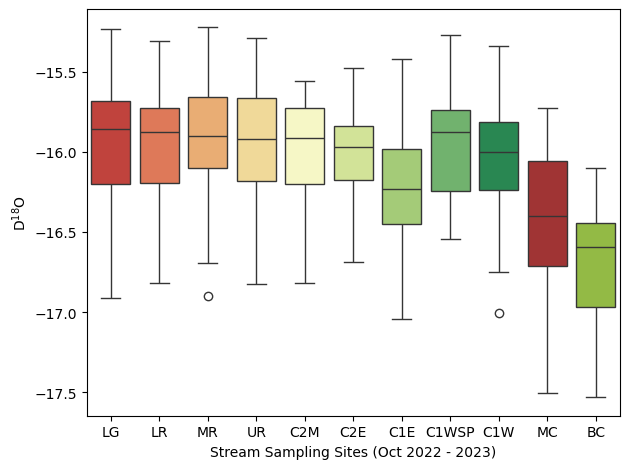

In [13]:
ss = s3.copy().reset_index(drop=True) 

ss['Stream_Sites'] = pd.Categorical(ss['Stream_Sites'], categories=hue_order, ordered=True)

# Create the boxplot
sns.boxplot(data=ss,
            x='Stream_Sites', y='D_18O', hue='Stream_Sites',
            order=hue_order, dodge=False,
            palette=color_dict
           ).set(
               xlabel='Stream Sampling Sites (Oct 2022 - 2023)',
               ylabel=r'$\mathregular{D^{18}}$O'
           )

# Remove redundant legend
plt.legend([], [], frameon=False)
plt.tight_layout()
plt.show()

### Elevation vs precipiation MCW

C:\Users\grena\AppData\Local\Temp\ipykernel_15952\1661676457.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([int(float(t.get_text())) for t in ax.get_xticklabels()], fontsize=14)


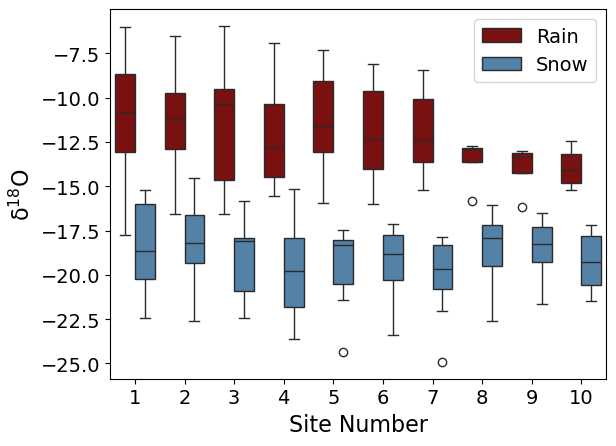

In [14]:
#Rain vs snow by site / elevation
# Define label mapping for legend
label_map = {'RC': 'Rain', 'IB': 'Snow'}

# Create the plot
ax = sns.boxplot(
    data=pd.concat([df]),
    x='Site_no', y='D_18O',
    hue='Type', hue_order=['RC', 'IB'],
    palette=['darkred', 'steelblue']
)
# Set axis labels
plt.xlabel('Site Number', fontsize=16)
plt.ylabel(r'$\mathregular{\delta^{18}}$O', fontsize=16)

# Set x-axis tick labels as integers
ax.set_xticklabels([int(float(t.get_text())) for t in ax.get_xticklabels()], fontsize=14)

# Adjust y-axis tick label font size
plt.yticks(fontsize=14)

# Modify legend labels
handles, labels = ax.get_legend_handles_labels()
new_labels = [label_map.get(l, l) for l in labels]
ax.legend(handles, new_labels, title=None, fontsize=14)

Assign elevations

In [15]:
# create a list of our conditions
conditions = [
    (df['Site_no'] == 1.0),
    (df['Site_no'] == 2.0),
    (df['Site_no'] == 3.0),
    (df['Site_no'] == 4.0),
    (df['Site_no'] == 5.0),
    (df['Site_no'] == 6.0),
    (df['Site_no'] == 7.0),
    (df['Site_no'] == 8.0),
    (df['Site_no'] == 9.0),
    (df['Site_no'] == 10.0),
    (df['Site_no'] == 'NaN')
    ]
# create a list of the values we want to assign for each condition
values = [922,1160,1266,1455,1755,1780,1860,2036,2145,2316,np.nan]
#treeline + BC
# LG+MC USGS
#Snotel Bogus + MC

# create a new column and use np.select to assign values to it using our lists as arguments
df['elevation'] = np.select(conditions, values)

def zero_to_nan(values):
    """Replace every 0 with 'nan' and return a copy."""
    return [float('nan') if x==0 else x for x in values]

print(zero_to_nan(values))

df['elevation'] = df['elevation'].apply(pd.to_numeric)
df.head()

[922, 1160, 1266, 1455, 1755, 1780, 1860, 2036, 2145, 2316, nan]


,Sample Name,Site_ID,Collection_Date,D_2H,D_2H_StDev,D_18O,D_18O_StDev,Type,Site_no,D_18O_Rain,...,D_18O_MC,D_18O_BC,D_2H_Rain,D_2H_Snow,D_18O_std_Rain,D_18O_std_Snow,D_18O_StDev_Precip,D_18O_Precip,D_2H_Precip,elevation
0,1,BC,2022-10-05,-126.803089,0.905,-16.459499,0.1660,BC,NaN,NaN,...,NaN,-16.459499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,2,MC,2022-10-05,-121.245698,0.503,-16.055768,0.0923,MC,NaN,NaN,...,-16.055768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,3,BC,2022-10-27,-124.454618,0.553,-16.515137,0.1370,BC,NaN,NaN,...,NaN,-16.515137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,4,MC,2022-10-27,-120.942857,0.834,-15.892233,0.2420,MC,NaN,NaN,...,-15.892233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,5,RC_01,2022-10-27,-92.796701,1.390,-12.540525,0.2320,RC,1.0,-12.540525,...,NaN,NaN,-92.796701,NaN,0.232,NaN,0.232,-12.540525,-92.796701,922.0


## Individual Site Precip values

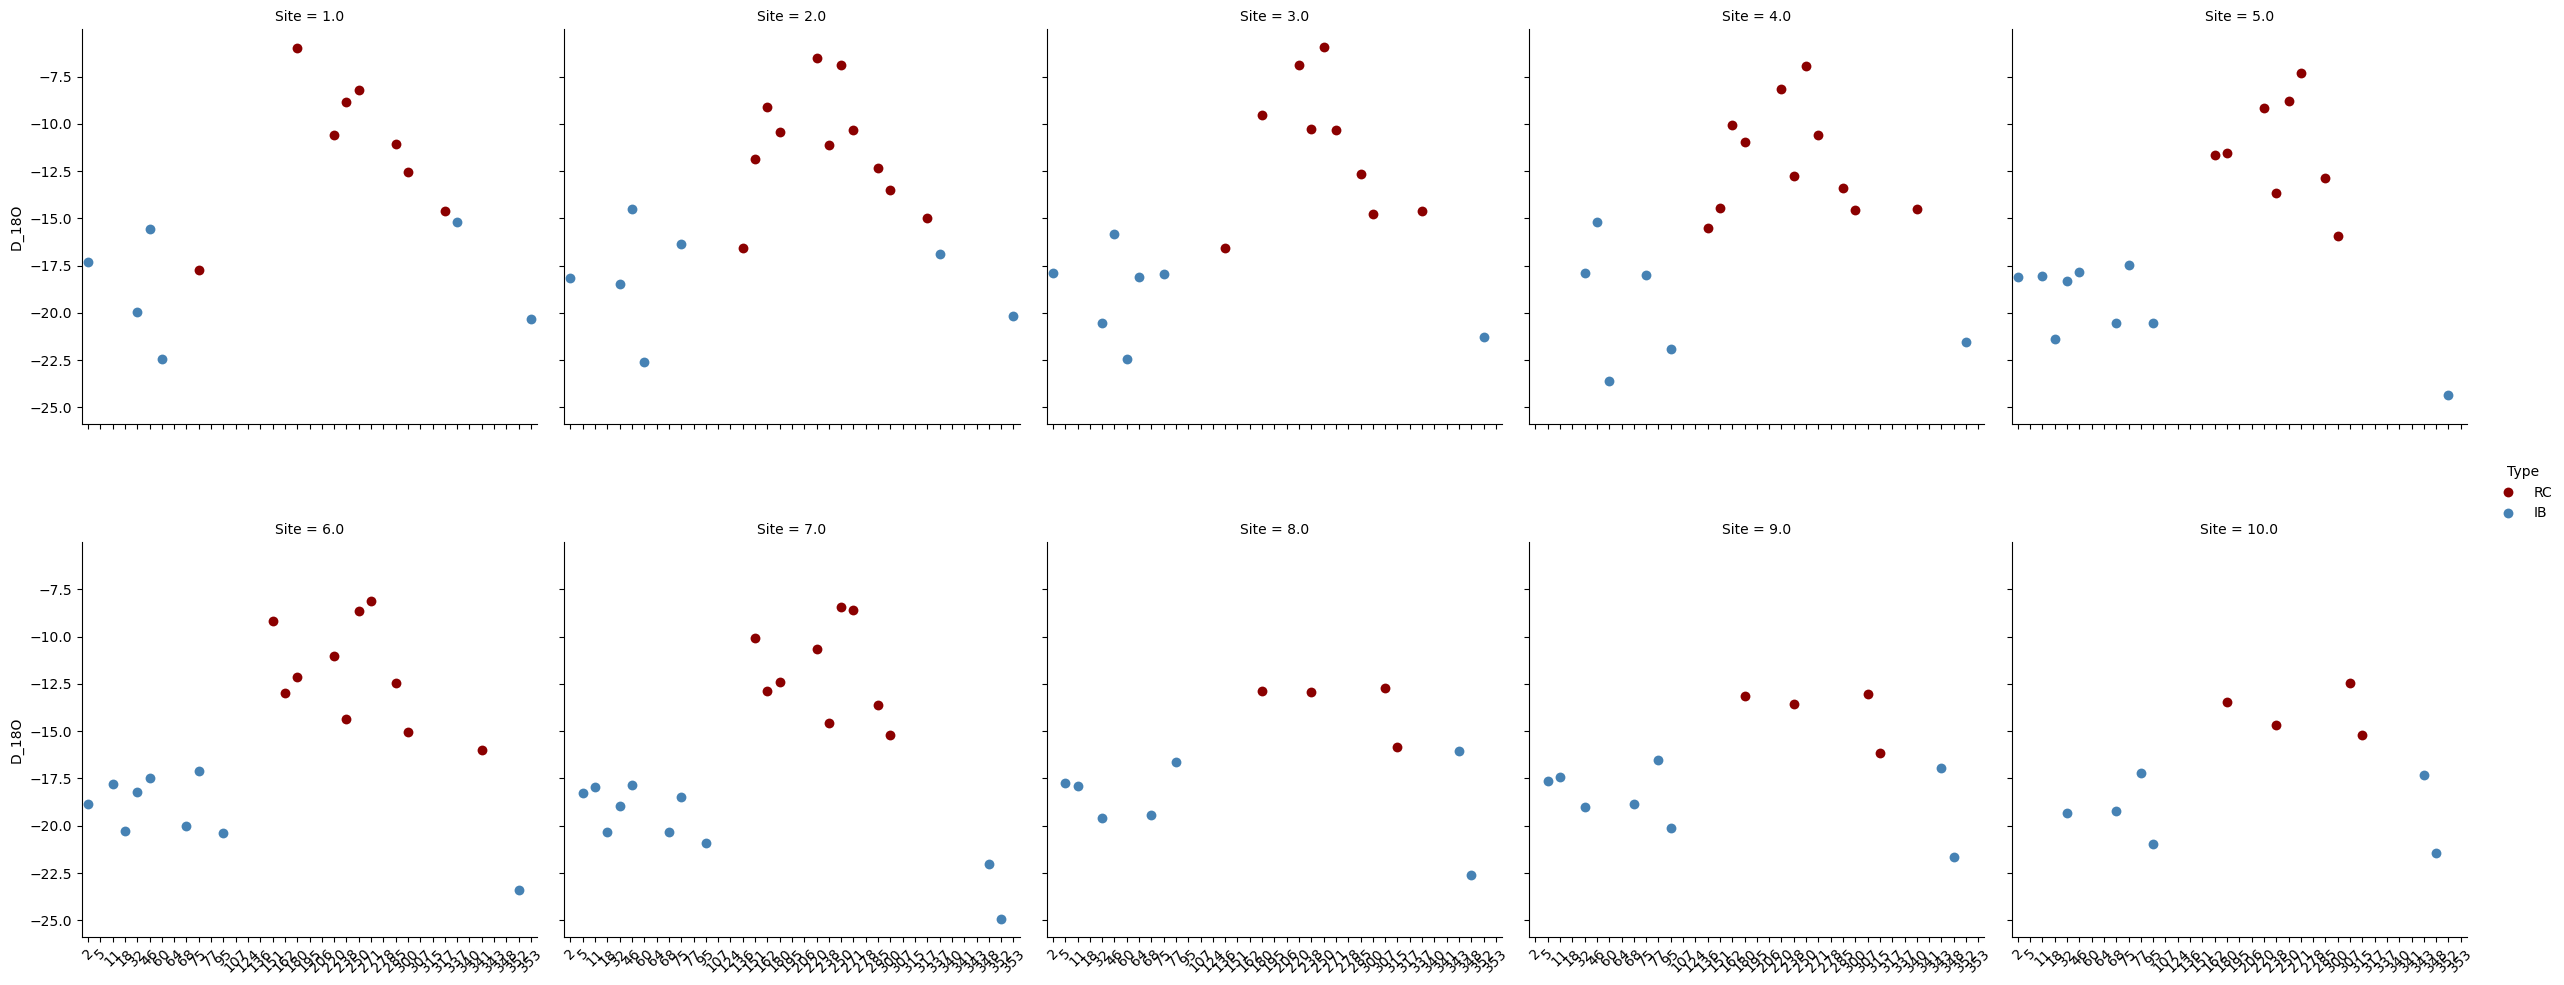

In [16]:
# Change 'Site_no' to 'Site'
df.rename(columns={'Site_no': 'Site'}, inplace=True)

df['Day_of_Year'] = df['Collection_Date'].dt.dayofyear

hue_order = ['RC', 'IB']
g = sns.catplot(data=df, x='Day_of_Year', y="D_18O", hue="Type", col="Site",
                hue_order=hue_order,
                palette=['darkred', 'steelblue'],
                col_wrap=5, s=50)
g.set_xlabels('')
for ax in g.axes:
    plt.setp(ax.get_xticklabels(), visible=True, rotation=45)
plt.subplots_adjust(hspace=0.3)
plt.show()

# Fitted Sine Curves

In [17]:
# Create a boolean mask for Site_no equal to 1.0
mask = df['Site'] == 1.0
p1 = df.loc[mask, 'D_18O_Precip']
t1 = df.loc[mask, 'Sample Name']

In [18]:
df['Day_of_Year'] = df['Collection_Date'].dt.dayofyear
from datetime import datetime, timedelta
# Define the start date of the water year
water_year_start = datetime.strptime('2022-10-01', '%Y-%m-%d')

# Calculate the date for the 302nd day of the water year
target_date = water_year_start + timedelta(days=301)  # Adding 301 days since we start counting from day 1

print("Date corresponding to the 302nd day of the water year:", target_date.strftime('%Y-%m-%d'))

Date corresponding to the 302nd day of the water year: 2023-07-29


Site_no 1.0: Crossing Point at x=128.49, y=-13.40 on 2022-05-09
Site_no 1.0: Crossing Point at x=302.05, y=-13.34 on 2022-10-30
Site_no 2.0: Crossing Point at x=136.57, y=-13.64 on 2022-05-17
Site_no 2.0: Crossing Point at x=301.00, y=-13.61 on 2022-10-29
Site_no 3.0: Crossing Point at x=139.34, y=-13.95 on 2022-05-20
Site_no 3.0: Crossing Point at x=304.35, y=-13.91 on 2022-11-01
Site_no 4.0: Crossing Point at x=149.56, y=-14.17 on 2022-05-30
Site_no 4.0: Crossing Point at x=299.15, y=-14.12 on 2022-10-27
Site_no 5.0: Crossing Point at x=137.59, y=-14.92 on 2022-05-18
Site_no 5.0: Crossing Point at x=298.75, y=-14.87 on 2022-10-26
Site_no 6.0: Crossing Point at x=131.63, y=-14.74 on 2022-05-12
Site_no 6.0: Crossing Point at x=303.30, y=-14.70 on 2022-10-31
Site_no 7.0: Crossing Point at x=136.64, y=-15.15 on 2022-05-17
Site_no 7.0: Crossing Point at x=293.99, y=-15.10 on 2022-10-21
Site_no 8.0: Crossing Point at x=133.75, y=-15.43 on 2022-05-14
Site_no 8.0: Crossing Point at x=306.46,

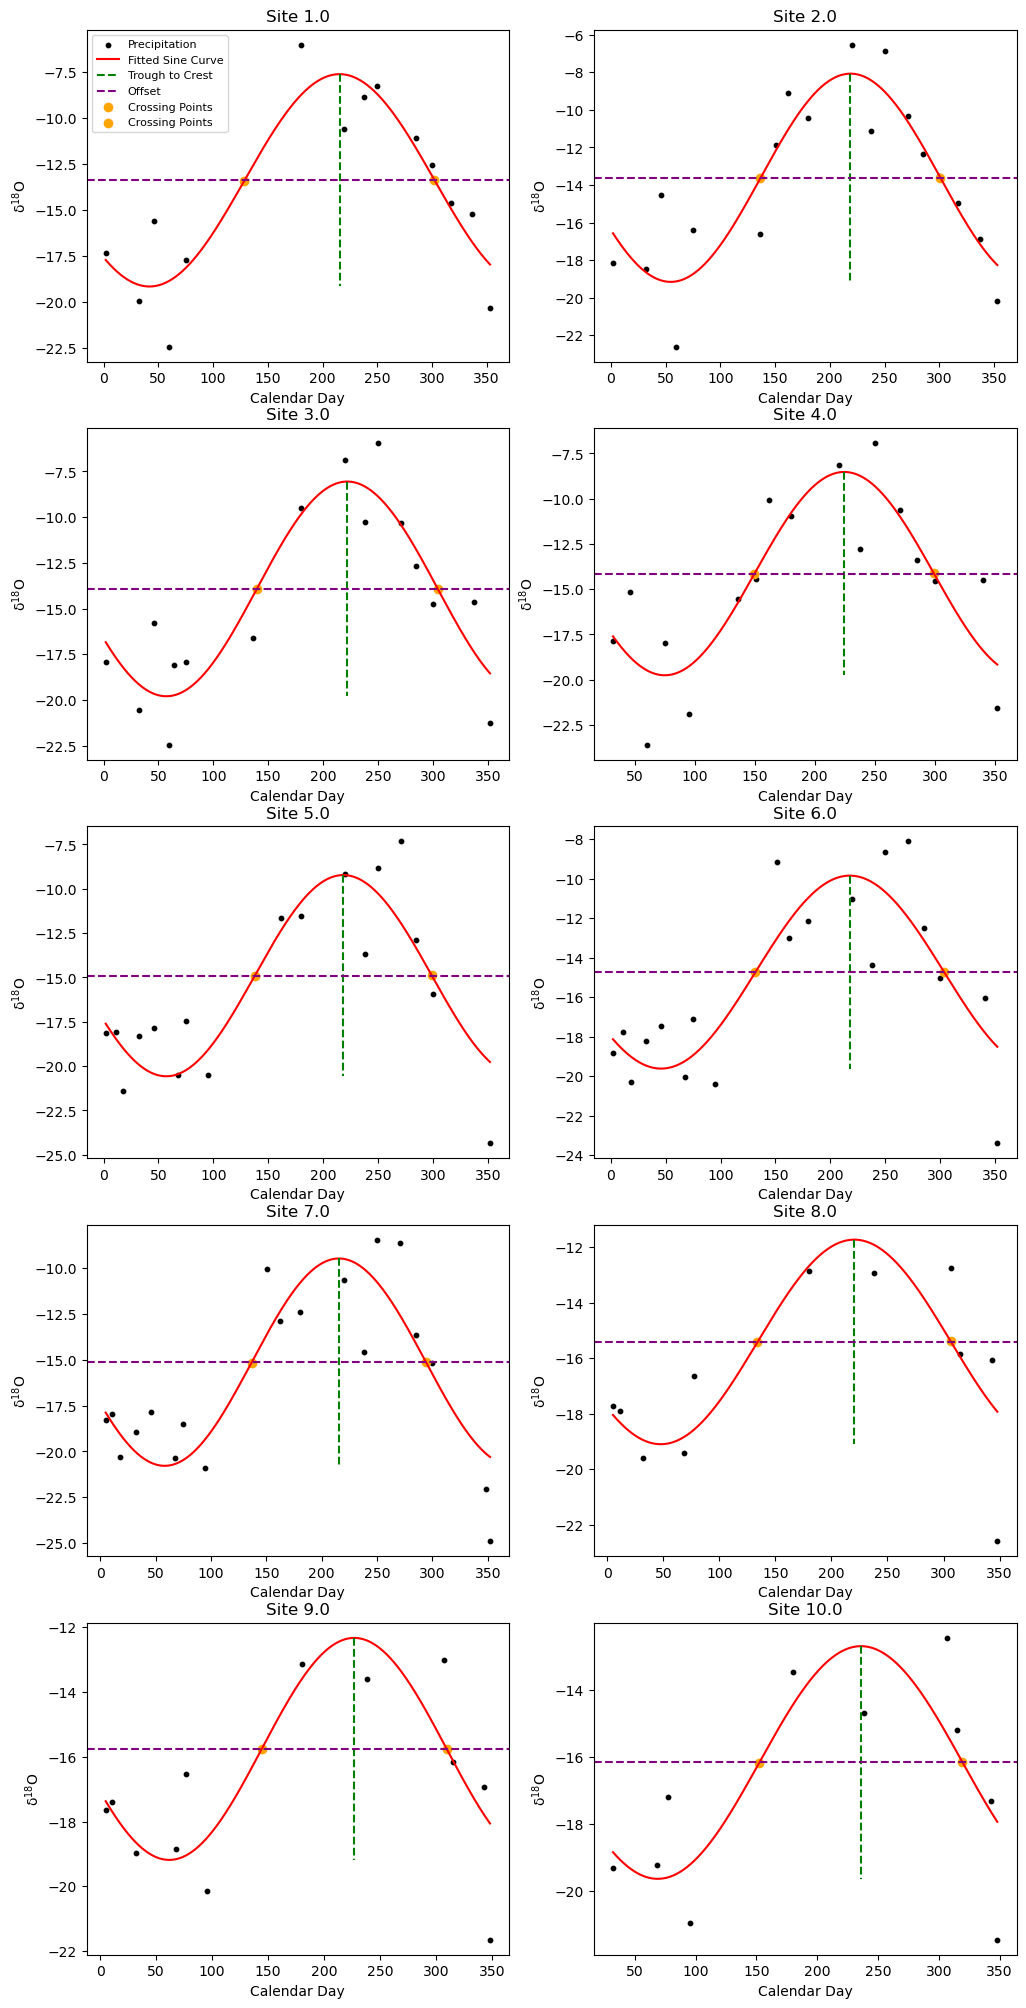

In [19]:
df['Day_of_Year'] = df['Collection_Date'].dt.dayofyear

# Define the sine function
def sine_function(x, A, omega, phi, offset):
    return A * np.sin(omega * x + phi) + offset

# List of unique Site_no values
site_numbers = df['Site'].dropna().unique()
num_sites = len(site_numbers)
num_cols = 2
num_rows = math.ceil(num_sites / num_cols)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 5 * num_rows))
axes = axes.flatten()

# Loop through each Site_no (excluding the first and last)
for i, site_no in enumerate(site_numbers):
    sub_df = df[df['Site'] == site_no]

    x_data = sub_df['Day_of_Year']
    y_data = sub_df['D_18O_Precip']

    # Check if there is any valid data
    if not (x_data.isnull().all() or y_data.isnull().all()):
        # Initial guess for the parameters
        initial_guess = (1, 2 * np.pi / 365, 0, np.nanmean(y_data))

        # Fit the sine function to the data
        try:
            params, covariance = curve_fit(sine_function, x_data, y_data, p0=initial_guess)
        except Exception as e:
            print(f"Error fitting sine curve for Site_no {site_no}: {e}")
            continue

        # Extract the fitted parameters
        A, omega, phi, offset = params

        # Generate x values for the smooth sine curve
        x_smooth = np.linspace(min(x_data), max(x_data), 1000)

        # Generate the fitted sine curve using the optimized parameters
        y_smooth = sine_function(x_smooth, A, omega, phi, offset)

        # Find amplitude and top of the trough
        amplitude = np.abs(A)
        trough_top = offset - amplitude
        
        # Find the indices where the offset crosses the sine curve
        crossing_indices = np.where(np.diff(np.sign(y_smooth - offset)))[0]
    
       # Create a subplot
        ax = axes[i]
        ax.scatter(x_data, y_data, label='Precipitation', color='black', s=10)
        ax.plot(x_smooth, y_smooth, label='Fitted Sine Curve', color='red')

        # Find amplitude and top of the trough
        amplitude = np.abs(A)
        trough_top = offset - amplitude

        # Find the index of the maximum value in the fitted sine curve
        max_index = np.argmax(y_smooth)

        # Plot amplitude line at the peak of the fitted sine curve
        #ax.axhline(y_smooth[max_index], linestyle='--', color='blue', label='Amplitude')

        # Plot line from amplitude to trough top
        ax.plot([x_smooth[max_index], x_smooth[max_index]], [y_smooth[max_index], trough_top], linestyle='--', color='green', label='Trough to Crest')    
        # Plot amplitude line at the peak of the fitted sine curve
        ax.axhline(y=offset, linestyle='--', color='purple', label='Offset')  
        
        # Plot points on both sides of the sine curve
        for idx in crossing_indices:
            x_val = x_smooth[idx]
            y_val = y_smooth[idx]
            ax.scatter(x_val, y_val, color='orange', marker='o', label='Crossing Points')
            # Convert day of the year to date
            base_date_time = datetime(2022, 1, 1)  
            crossing_date = base_date_time + timedelta(days=int(x_val))
            
            # Print the values of the crossing points with date information
            print(f"Site_no {site_no}: Crossing Point at x={x_val:.2f}, y={y_val:.2f} on {crossing_date.strftime('%Y-%m-%d')}")
            
        ax.set_xlabel('Calendar Day')
        ax.set_ylabel(r'$\mathregular{\delta^{18}}$O')
        ax.set_title(f'Site {site_no}')
        
    else:
        print(f"Skipping Site {site_no} as there is no valid data.")
        print(f"Offset: {offset}")
    
# Create a single legend for all graphs
axes[0].legend(loc='upper left',fontsize=8)
# The months are in calendar year 

In [20]:
#Std error for sinudoidal
# Extract the standard errors from the covariance matrix
standard_errors = np.sqrt(np.diag(covariance))

# Print the fitted parameters and their standard errors
print("Fitted parameters:", params)
print("Standard errors:", standard_errors)
# amp, freq, phase shift, vertical shift 

Fitted parameters: [ -3.46832568   0.01879118   0.2790924  -16.16456999]
Standard errors: [1.18637926 0.00351368 0.94293328 1.00368169]


In [21]:
# Extract fitted parameters and their standard errors
A, B, C, D = params
sigma_A, sigma_B, sigma_C, sigma_D = standard_errors

# Compute standard errors for the peak and trough
sigma_peak = np.sqrt(sigma_A**2 + sigma_D**2)
sigma_trough = np.sqrt(sigma_A**2 + sigma_D**2)

# Compute the peak and trough values
peak = D + A
trough = D - A

peak_error_percentage = (sigma_peak / abs(peak)) 
trough_error_percentage = (sigma_trough / abs(trough)) 
print('Peak f SE', peak_error_percentage)
print('Trough f SE', trough_error_percentage)

# Print the results
print("Fitted parameters:")
print(f"A (Amplitude): {A}")
print(f"B (Frequency): {B}")
print(f"C (Phase Shift): {C}")
print(f"D (Vertical Shift): {D}")

print("\nStandard errors:")
print(f"Standard error for A: {sigma_A}")
print(f"Standard error for B: {sigma_B}")
print(f"Standard error for C: {sigma_C}")
print(f"Standard error for D: {sigma_D}")

print("\nPeak and Trough:")
print(f"Peak value: {peak}")
print(f"Standard error for peak: {sigma_peak}")
print(f"Trough value: {trough}")
print(f"Standard error for trough: {sigma_trough}")

Peak f SE 0.07915215829088287
Trough f SE 0.12239730325464146
Fitted parameters:
A (Amplitude): -3.468325676784301
B (Frequency): 0.018791180564621222
C (Phase Shift): 0.27909240310812244
D (Vertical Shift): -16.164569992914092

Standard errors:
Standard error for A: 1.1863792624636247
Standard error for B: 0.0035136821240136945
Standard error for C: 0.9429332831878094
Standard error for D: 1.0036816916538747

Peak and Trough:
Peak value: -19.632895669698392
Standard error for peak: 1.553986065756356
Trough value: -12.69624431612979
Standard error for trough: 1.553986065756356


In [22]:
#Fraction of SE
#Peak 
peak_se = 1.5539 / np.abs(-19.6328)
print('peak se',peak_se)
trough_se = 1.5539 / np.abs(-12.6962)
print('trough se', trough_se)

peak se 0.07914816022166986
trough se 0.12239095162332038


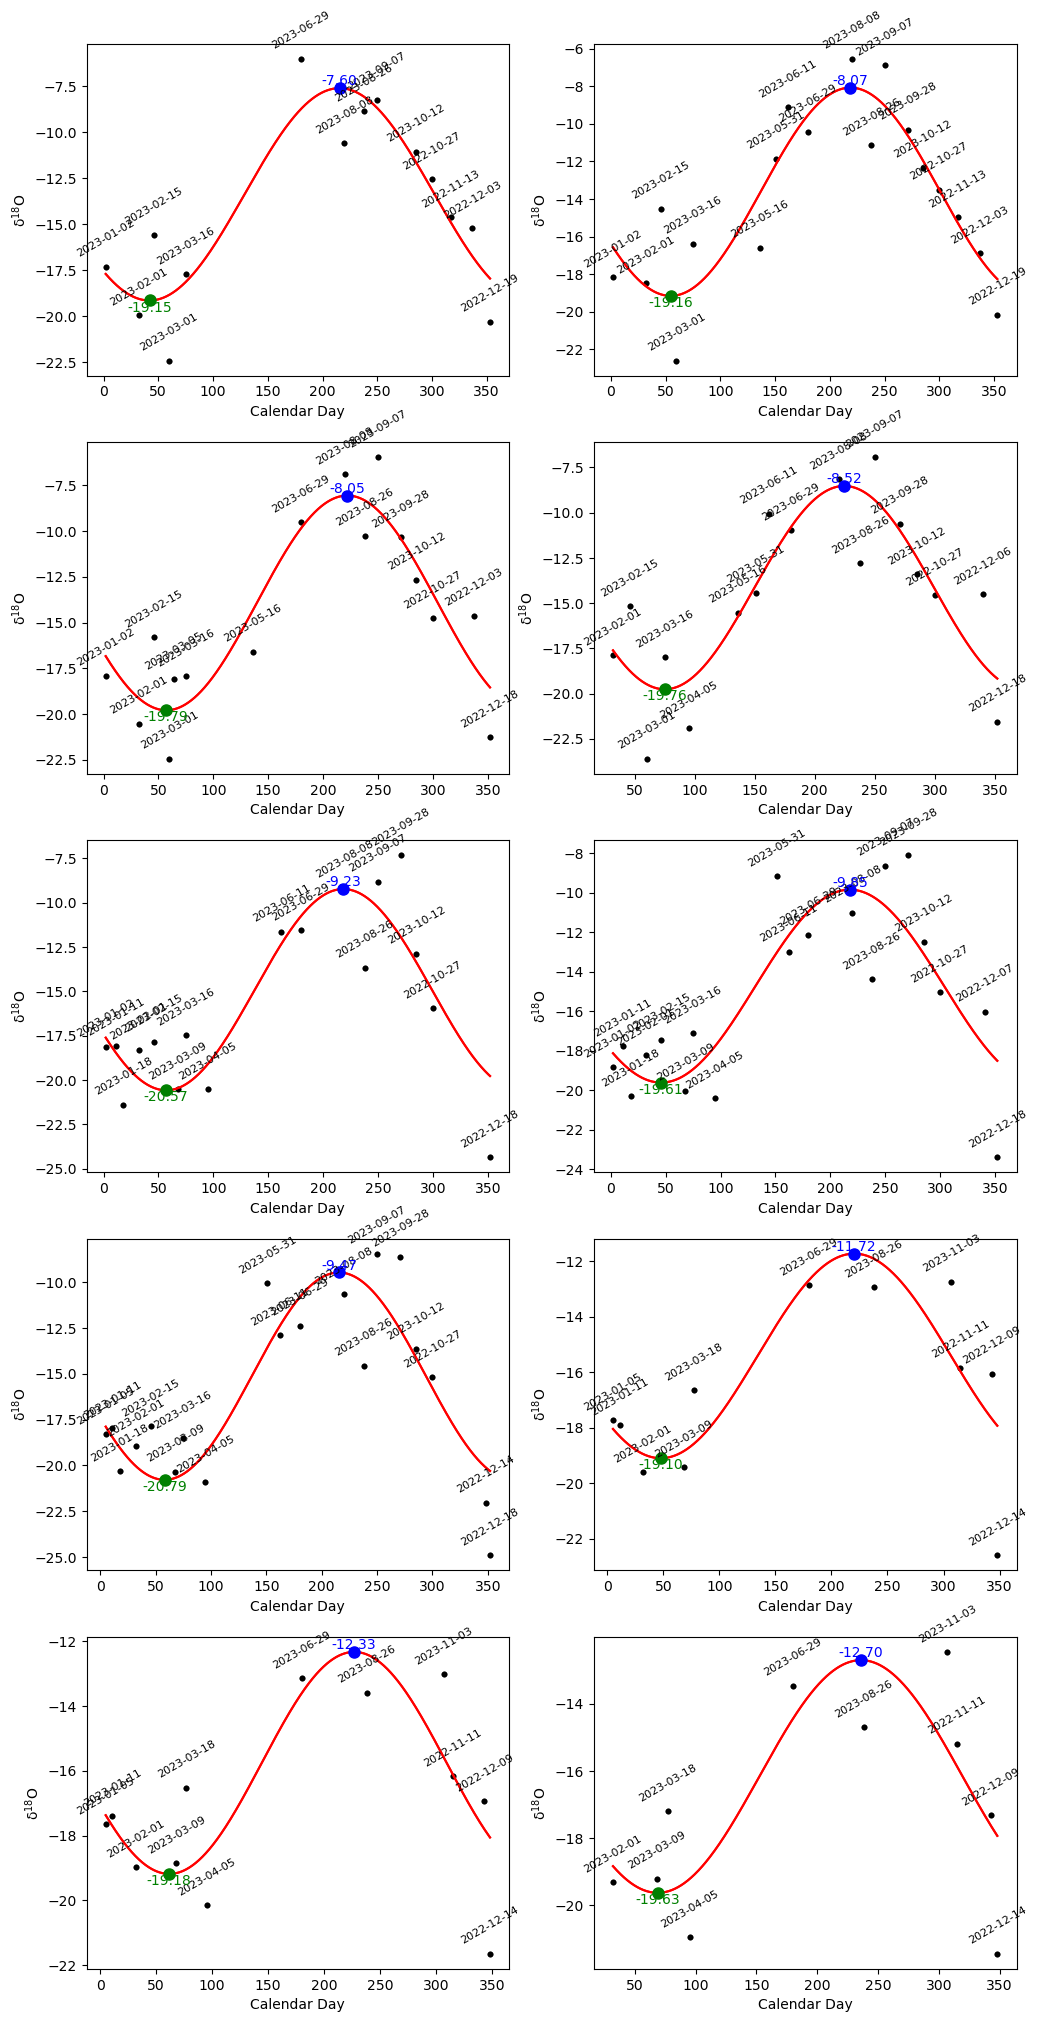

In [23]:
# Define the sine function
def sine_function(x, A, omega, phi, offset):
    return A * np.sin(omega * x + phi) + offset

# List of unique Site_no values
site_numbers = df['Site'].dropna().unique()
num_sites = len(site_numbers)

num_cols = 2
num_rows = math.ceil(num_sites / num_cols)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 5 * num_rows))
axes = axes.flatten()


for i, site_no in enumerate(site_numbers):
    sub_df = df[df['Site'] == site_no]

    x_data = sub_df['Day_of_Year']
    y_data = sub_df['D_18O_Precip']
    dates = sub_df['Collection_Date']

    if not (x_data.isnull().all() or y_data.isnull().all()):
        initial_guess = (1, 2 * np.pi / 365, 0, np.nanmean(y_data))

        try:
            params, covariance = curve_fit(sine_function, x_data, y_data, p0=initial_guess)
        except Exception as e:
            print(f"Error fitting sine curve for Site_no {site_no}: {e}")
            continue

        A, omega, phi, offset = params
        x_smooth = np.linspace(min(x_data), max(x_data), 1000)
        y_smooth = sine_function(x_smooth, A, omega, phi, offset)

        ax = axes[i]
        ax.scatter(x_data, y_data, label=f'Site {site_no} Data', color='black', s=10)
        ax.plot(x_smooth, y_smooth, label=f'Site {site_no} Fitted Sine Curve', color='red')
        
        #this is new
        # Annotate each data point with its date
        for (x, y, date) in zip(x_data, y_data, dates):
            ax.annotate(date.strftime('%Y-%m-%d'), (x, y), textcoords="offset points", xytext=(0,7), ha='center',fontsize=8,rotation=30)
            
        # Find peaks and troughs
        peaks, _ = scipy.signal.find_peaks(y_smooth)
        troughs, _ = scipy.signal.find_peaks(-y_smooth)

        ax = axes[i]
        ax.scatter(x_data, y_data, label=f'Site {site_no} Data', color='black', s=10)
        ax.plot(x_smooth, y_smooth, label=f'Site {site_no} Fitted Sine Curve', color='red')
        ax.plot(x_smooth[peaks], y_smooth[peaks], "ob", markersize=8)
        ax.plot(x_smooth[troughs], y_smooth[troughs], "og", markersize=8)
        
        # Annotate peaks and troughs with D_18O_Precip values
        for peak in peaks:
            ax.text(x_smooth[peak], y_smooth[peak], f'{y_smooth[peak]:.2f}', ha='center', va='bottom', color='blue')
        for trough in troughs:
            ax.text(x_smooth[trough], y_smooth[trough], f'{y_smooth[trough]:.2f}', ha='center', va='top', color='green')

for ax in axes:
    ax.set_xlabel('Calendar Day')
    ax.set_ylabel(r'$\mathregular{\delta^{18}}$O')

# Individaul Sine Cure and SE

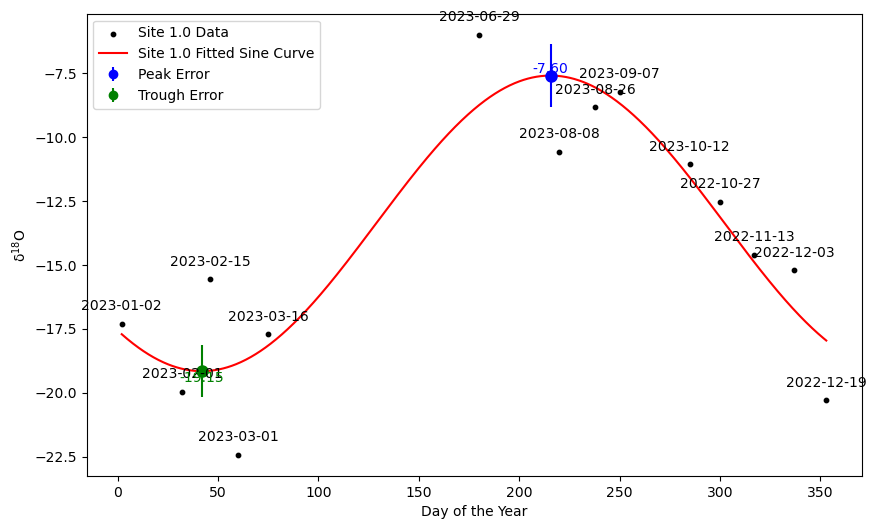

[np.float64(1.2404660704107702)] : Peak Error
[np.float64(1.006456596007225)] : Trough Error


In [24]:
#SITE SPECIFIC ONLY
# Define the sine function
def sine_function(x, A, omega, phi, offset):
    return A * np.sin(omega * x + phi) + offset

# Filter the dataframe for site_no == X.X
site_no = 1.0
sub_df = df[df['Site'] == site_no]

x_data = sub_df['Day_of_Year']
y_data = sub_df['D_18O_Precip']
dates = sub_df['Collection_Date']

if not (x_data.isnull().all() or y_data.isnull().all()):
    initial_guess = (1, 2 * np.pi / 365, 0, np.nanmean(y_data))

    try:
        params, covariance = curve_fit(sine_function, x_data, y_data, p0=initial_guess)
    except Exception as e:
        print(f"Error fitting sine curve for Site_no {site_no}: {e}")
    else:
        A, omega, phi, offset = params
        x_smooth = np.linspace(min(x_data), max(x_data), 1000)
        y_smooth = sine_function(x_smooth, A, omega, phi, offset)

        # Plot the data and fitted sine curve
        plt.figure(figsize=(10, 6))
        plt.scatter(x_data, y_data, label=f'Site {site_no} Data', color='black', s=10)
        plt.plot(x_smooth, y_smooth, label=f'Site {site_no} Fitted Sine Curve', color='red')

        # Annotate each data point with its date
        for (x, y, date) in zip(x_data, y_data, dates):
            plt.annotate(date.strftime('%Y-%m-%d'), (x, y), textcoords="offset points", xytext=(0, 10), ha='center')

        # Find peaks and troughs
        peaks, _ = scipy.signal.find_peaks(y_smooth)
        troughs, _ = scipy.signal.find_peaks(-y_smooth)

        plt.plot(x_smooth[peaks], y_smooth[peaks], "ob", markersize=8)  # Peaks
        plt.plot(x_smooth[troughs], y_smooth[troughs], "og", markersize=8)  # Troughs

        # Annotate peaks and troughs with D_18O_Precip values
        for peak in peaks:
            plt.text(x_smooth[peak], y_smooth[peak], f'{y_smooth[peak]:.2f}', ha='center', va='bottom', color='blue')
        for trough in troughs:
            plt.text(x_smooth[trough], y_smooth[trough], f'{y_smooth[trough]:.2f}', ha='center', va='top', color='green')

        # Calculate error propagation
        def error_propagation(x, params, covariance):
            A, omega, phi, offset = params
            partial_A = np.sin(omega * x + phi)
            partial_omega = A * x * np.cos(omega * x + phi)
            partial_phi = A * np.cos(omega * x + phi)
            partial_offset = 1

            jacobian = np.array([partial_A, partial_omega, partial_phi, partial_offset])

            error = np.sqrt(np.dot(jacobian.T, np.dot(covariance, jacobian)))
            return error

        peak_errors = [error_propagation(x_smooth[peak], params, covariance) for peak in peaks]
        trough_errors = [error_propagation(x_smooth[trough], params, covariance) for trough in troughs]

        # Add error bars to peaks and troughs
        plt.errorbar(x_smooth[peaks], y_smooth[peaks], yerr=peak_errors, fmt='o', color='blue', label='Peak Error')
        plt.errorbar(x_smooth[troughs], y_smooth[troughs], yerr=trough_errors, fmt='o', color='green', label='Trough Error')

        # Set plot labels
        plt.xlabel('Day of the Year')
        plt.ylabel(r'$\mathregular{\delta^{18}}$O')
        plt.legend(loc='upper left')

        plt.show()
print(peak_errors, ': Peak Error')
print(trough_errors,': Trough Error')

In [25]:
# SITE SPECIFIC ONLY
# Extract fitted parameters and their standard errors for the specified site above Site = X.X
A, B, C, D = params
sigma_A, sigma_B, sigma_C, sigma_D = standard_errors

# Compute standard errors for the peak and trough
sigma_peak = np.sqrt(sigma_A**2 + sigma_D**2)
sigma_trough = np.sqrt(sigma_A**2 + sigma_D**2)

# Compute the peak and trough values
peak = D + A
trough = D - A

peak_error_percentage = (sigma_peak / abs(peak)) 
trough_error_percentage = (sigma_trough / abs(trough)) 
print('Peak f SE', peak_error_percentage)
print('Trough f SE', trough_error_percentage)

# Print the results
print("Fitted parameters:")
print(f"A (Amplitude): {A}")
print(f"B (Frequency): {B}")
print(f"C (Phase Shift): {C}")
print(f"D (Vertical Shift): {D}")

print("\nStandard errors:")
print(f"Standard error for A: {sigma_A}")
print(f"Standard error for B: {sigma_B}")
print(f"Standard error for C: {sigma_C}")
print(f"Standard error for D: {sigma_D}")

print("\nPeak and Trough:")
print(f"Peak value: {peak}")
print(f"Standard error for peak: {sigma_peak}")
print(f"Trough value: {trough}")
print(f"Standard error for trough: {sigma_trough}")

Peak f SE 0.08112751595829905
Trough f SE 0.20453164579358996
Fitted parameters:
A (Amplitude): -5.778540042871887
B (Frequency): 0.018092428089735338
C (Phase Shift): -5.4711861907943105
D (Vertical Shift): -13.376318175086272

Standard errors:
Standard error for A: 1.1863792624636247
Standard error for B: 0.0035136821240136945
Standard error for C: 0.9429332831878094
Standard error for D: 1.0036816916538747

Peak and Trough:
Peak value: -19.154858217958157
Standard error for peak: 1.553986065756356
Trough value: -7.597778132214385
Standard error for trough: 1.553986065756356


In [26]:
#Residual SE:
Sine_SE_Peak_1 = 0.7039
Sine_SE_Trough_1 = 0.736

two_Sine_SE_Peak = 0.4854
two_Sine_SE_Trough = 0.8102

three_Sine_SE_Peak = 0.5749
three_Sine_SE_Trough = 0.786

four_Sine_SE_Peak = 0.6896
four_Sine_SE_Trough = 0.8674

five_Sine_SE_Peak = 0.91521
five_Sine_SE_Trough = 0.6857

six_Sine_SE_Peak = 0.8308
six_Sine_SE_Trough = 0.6845

sev_Sine_SE_Peak = 0.9553
sev_Sine_SE_Trough = 0.5935

egt_Sine_SE_Peak = 0.5171
egt_Sine_SE_Trough = 0.6720

nine_Sine_SE_Peak = 0.9622
nine_Sine_SE_Trough = 0.5327

ten_Sine_SE_Peak = 0.93019
ten_Sine_SE_Trough = 0.7755

## End-Member Sine Curve Fitting SE

In [27]:
# average STD ERROr from all sites (1 through 10)
PEAK_SE = (Sine_SE_Peak_1 + two_Sine_SE_Peak + three_Sine_SE_Peak+four_Sine_SE_Peak + five_Sine_SE_Peak+six_Sine_SE_Peak +sev_Sine_SE_Peak+egt_Sine_SE_Peak+nine_Sine_SE_Peak+ten_Sine_SE_Peak)/10
print('Residual Peak SE', PEAK_SE)
Trough_Se=(Sine_SE_Trough_1+two_Sine_SE_Trough+three_Sine_SE_Trough+four_Sine_SE_Trough+five_Sine_SE_Trough+six_Sine_SE_Trough+sev_Sine_SE_Trough+egt_Sine_SE_Trough+nine_Sine_SE_Trough+ten_Sine_SE_Trough)/10
print('Residual Trough SE', Trough_Se)

Residual Peak SE 0.75646
Residual Trough SE 0.7143499999999999


In [28]:
#Bannock Creek
# average STD ERROr from sites (2 through 8)
PEAK_SE_BC = (two_Sine_SE_Peak + three_Sine_SE_Peak+four_Sine_SE_Peak + five_Sine_SE_Peak+six_Sine_SE_Peak +sev_Sine_SE_Peak+egt_Sine_SE_Peak)/7
print('BC Res Peak SE', PEAK_SE_BC)
Trough_Se_BC =(two_Sine_SE_Trough+three_Sine_SE_Trough+four_Sine_SE_Trough+five_Sine_SE_Trough+six_Sine_SE_Trough+sev_Sine_SE_Trough+egt_Sine_SE_Trough)/7
print('BC Res Trough SE', Trough_Se_BC)

BC Res Peak SE 0.7097585714285713
BC Res Trough SE 0.7284714285714285


## Snow vs. Rain Isotope Averages w/ associated Precipitaiton Accumulation

In [29]:
pp = pd.read_csv('../Data/15.RC_Accum_BySite.csv', parse_dates = [0]) # precip accum (mm) from WRF
pp['Collection_Date'] = pd.to_datetime(pp['Collection_Date'])
pp['Day_of_Year'] = pp['Collection_Date'].dt.dayofyear
pp.head(3)

,Collection_Date,RC_01,RC_02,RC_03,RC_04,RC_05,RC_06,RC_07,RC_08,RC_09,RC_10,Day_of_Year
0,2022-10-27,17.309175,20.271681,20.374826,30.785867,52.697694,58.361384,55.354288,NaN,NaN,NaN,300
1,2022-11-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,198.962738,194.910414,212.039539,315
2,2022-11-13,51.119456,68.786448,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,317


In [30]:
a = pd.read_csv('../Data/14.MCW_Precip_Iso_Metrics.csv',parse_dates = [2]) # isotope values with elevation
a['Collection_Date'] = pd.to_datetime(a['Collection_Date'])
a['Day_of_Year'] = a['Collection_Date'].dt.dayofyear
a.head(3)

,Sample Name,Site_ID,Collection_Date,D_2H,D_2H_StDev,D_18O,D_18O_StDev,Type,Site_no,D_18O_Precip,elevation,Day_of_Year
0,5,RC_01,2022-10-27,-92.796701,1.390,-12.540525,0.232,RC,1,-12.540525,922,300
1,6,RC_02,2022-10-27,-95.549245,0.928,-13.497653,0.164,RC,2,-13.497653,1160,300
2,7,RC_03,2022-10-27,-104.588535,1.740,-14.756808,0.255,RC,3,-14.756808,1266,300


In [31]:
# Combine isotope values and precip accum
merged_df = pd.merge(a, pp, left_on='Collection_Date', right_on='Collection_Date', how='inner')
merged_df.head(3)

,Sample Name,Site_ID,Collection_Date,D_2H,D_2H_StDev,D_18O,D_18O_StDev,Type,Site_no,D_18O_Precip,...,RC_02,RC_03,RC_04,RC_05,RC_06,RC_07,RC_08,RC_09,RC_10,Day_of_Year_y
0,5,RC_01,2022-10-27,-92.796701,1.390,-12.540525,0.232,RC,1,-12.540525,...,20.271681,20.374826,30.785867,52.697694,58.361384,55.354288,NaN,NaN,NaN,300
1,6,RC_02,2022-10-27,-95.549245,0.928,-13.497653,0.164,RC,2,-13.497653,...,20.271681,20.374826,30.785867,52.697694,58.361384,55.354288,NaN,NaN,NaN,300
2,7,RC_03,2022-10-27,-104.588535,1.740,-14.756808,0.255,RC,3,-14.756808,...,20.271681,20.374826,30.785867,52.697694,58.361384,55.354288,NaN,NaN,NaN,300


In [32]:
# Specify the columns to make negative to graph on same plot as isotope value
columns_to_make_negative = ['RC_01', 'RC_02', 'RC_03', 'RC_04', 'RC_05', 'RC_06', 'RC_07', 'RC_08', 'RC_09', 'RC_10']

# Make the specified columns negative
merged_df[columns_to_make_negative] = -merged_df[columns_to_make_negative]

In [33]:
merged_df.rename(columns={'Site_no': 'Site'}, inplace=True)
merged_df['Month_Name'] = merged_df['Collection_Date'].dt.month_name()
merged_df['Year'] = merged_df['Collection_Date'].dt.year
#a['Month_Year'] = a['Month_Name'] + ' ' + a['Year'].astype(str)
merged_df['Month_Year'] = merged_df['Month_Name'].str.slice(0, 3) + ' ' + merged_df['Year'].astype(str).str[-2:]
merged_df['Day_of_Year_y'] = merged_df['Day_of_Year_y'].astype(str)
merged_df.head(1)

,Sample Name,Site_ID,Collection_Date,D_2H,D_2H_StDev,D_18O,D_18O_StDev,Type,Site,D_18O_Precip,...,RC_05,RC_06,RC_07,RC_08,RC_09,RC_10,Day_of_Year_y,Month_Name,Year,Month_Year
0,5,RC_01,2022-10-27,-92.796701,1.39,-12.540525,0.232,RC,1,-12.540525,...,-52.697694,-58.361384,-55.354288,NaN,NaN,NaN,300,October,2022,Oct 22


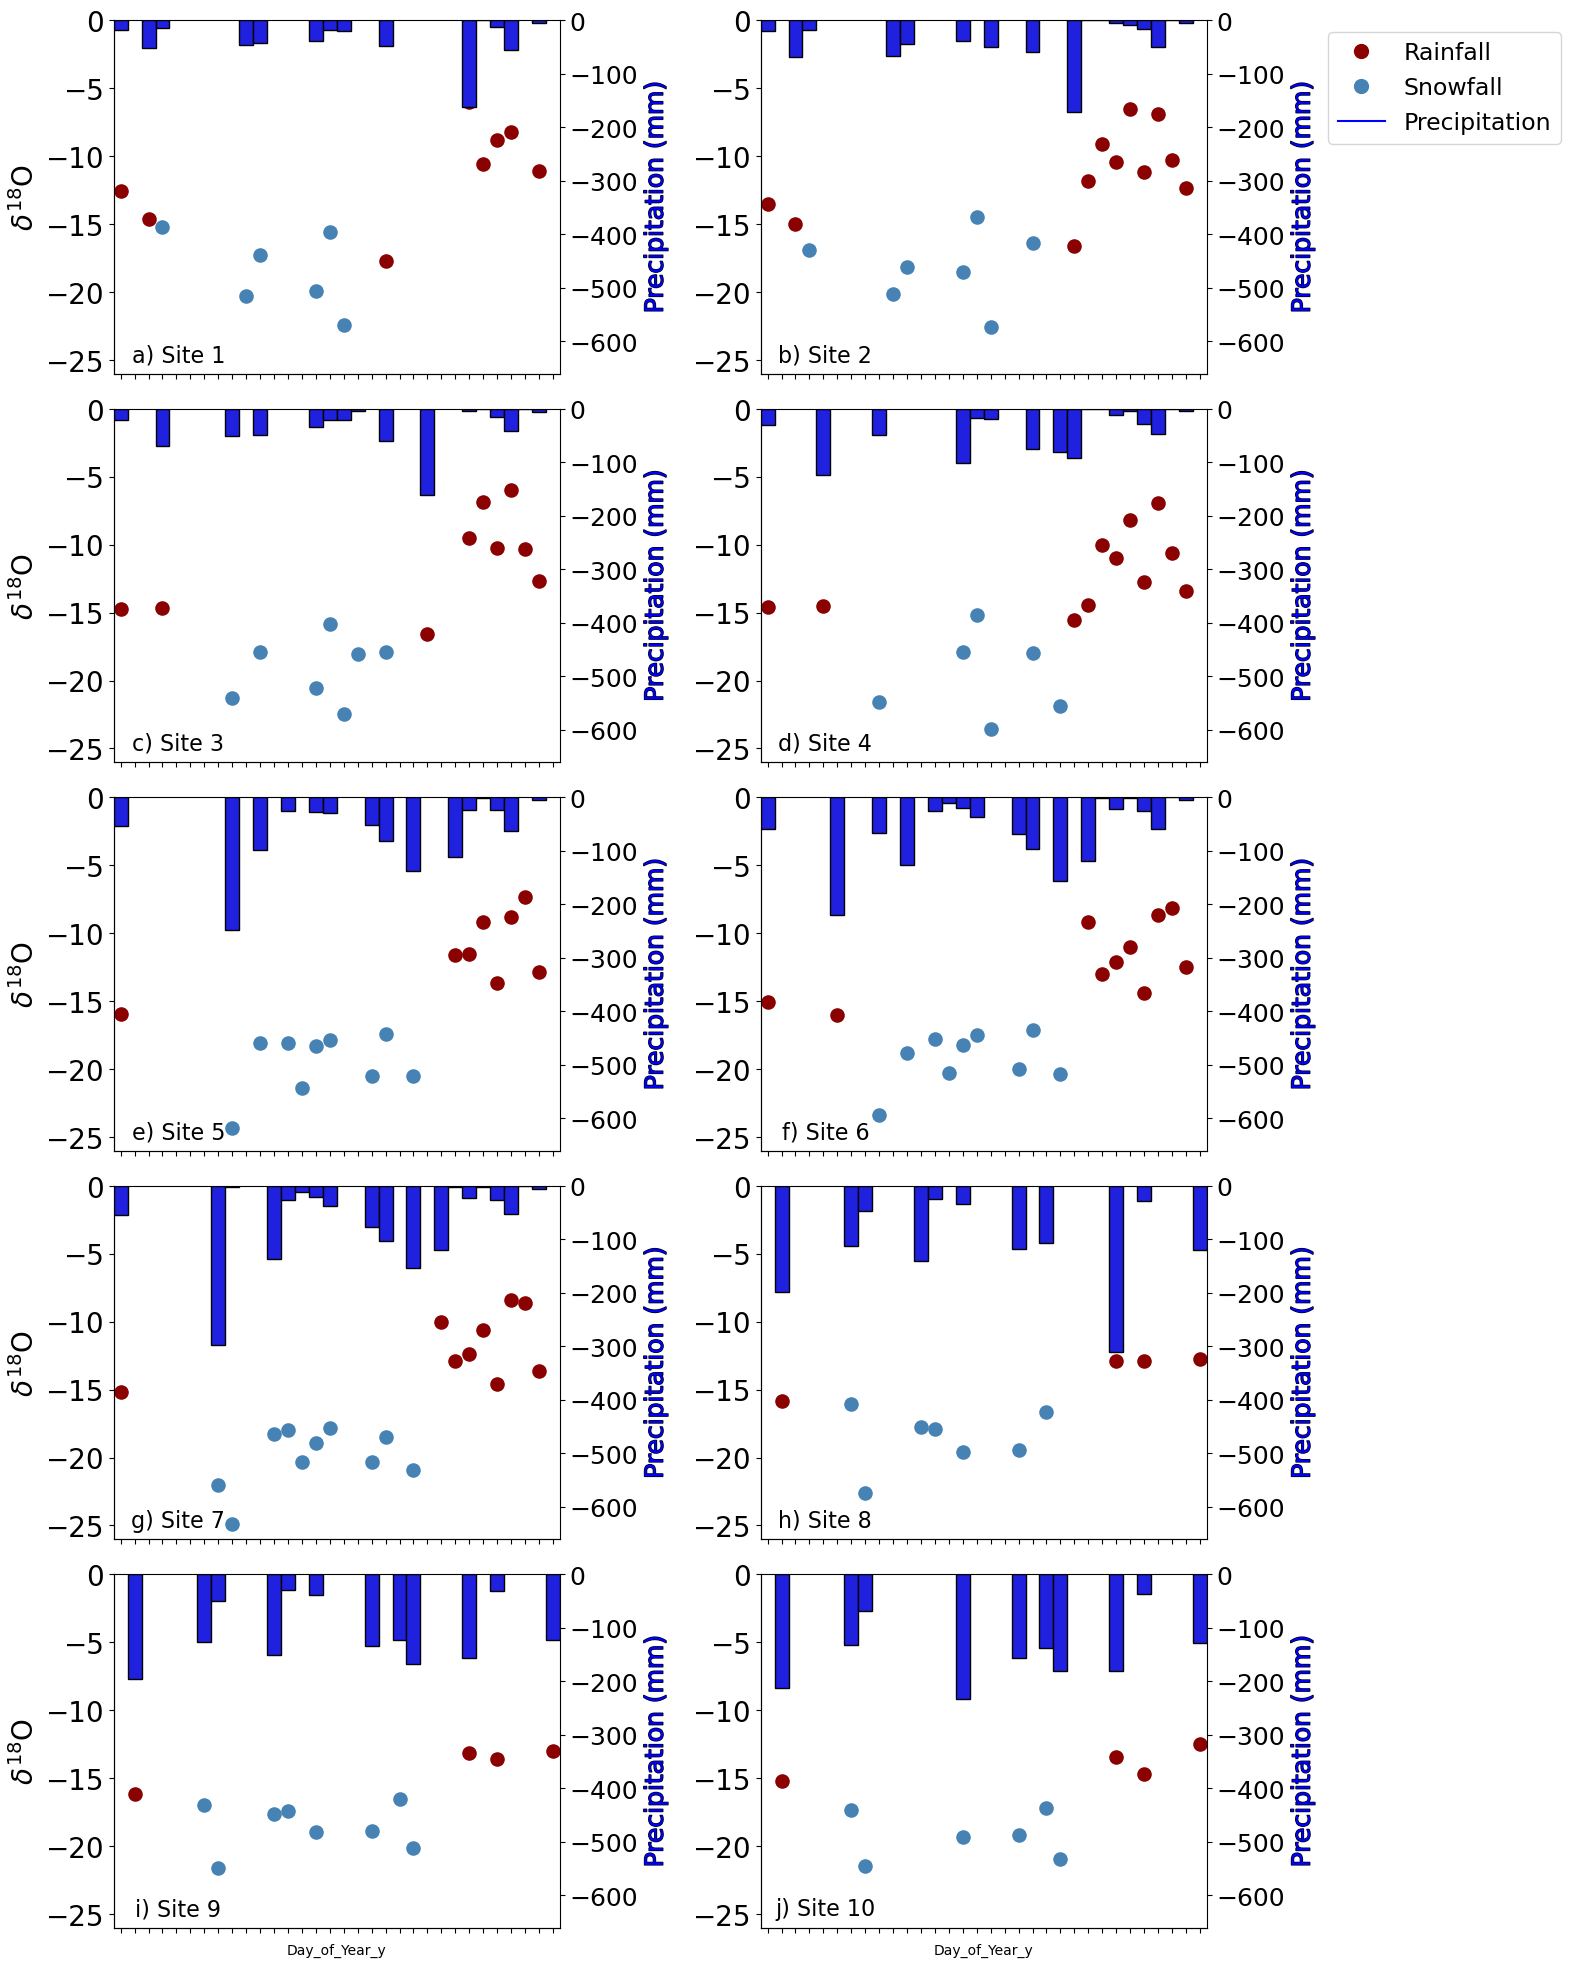

In [34]:
hue_order = ['RC', 'IB']
g = sns.catplot(data=merged_df, x='Day_of_Year_y', y="D_18O", hue="Type", col="Site",
                hue_order=hue_order,
                palette=['darkred', 'steelblue'],
                col_wrap=2, s=110,legend=False, height=4, aspect=1.5)
g.fig.subplots_adjust (wspace=.45, hspace=.1 )

#Set labels for both x-axis and y-axis with a specified font size
g.set_axis_labels(y_var=r"$\delta^{18}$O", fontsize=20)
g.set_titles("")
g.set_xticklabels(fontsize=17)
g.tick_params(axis='x', labelsize=14, rotation=45)
# Loop through each axes (subplot) to add text
for i, ax in enumerate(g.axes.flat):
    # Generating custom text for each subplot: "a) Site 1", "b) Site 2", etc.
    text_label = f"{chr(97 + i)}) Site {i + 1}"
    # Add the text to the subplot
    # Adjust x and y to position text; you might need to adjust these values based on layout
    ax.text(x=0.145, y=0.02, s=text_label, transform=ax.transAxes, ha="center", va="bottom", fontsize=16)
    ax.set_ylim(-26, 0)
    
# Loop over each axes
for i, ax in enumerate(g.axes.flat):
    # Create a second y-axis
    ax2 = ax.twinx()
    
    # Plot 'RC_01' to 'RC_10' on the second y-axis as line plots against 'Collection_Date'
    for j in range(1, 11):
        if i == j - 1:  # 'Site_no' j
            sns.barplot(x='Day_of_Year_y', y=f'RC_{j:02d}', data=merged_df, 
                        ax=ax2, color='blue', width=1.0,errorbar=None, edgecolor='black')
    ax2.set_ylim(-660, 0)
    ax.tick_params(axis='y', which='major', labelsize=20)
    text = ax2.set_ylabel('Precipitation (mm)', fontsize=18)
    ax2.yaxis.label.set_color('blue')
    ax2.tick_params(axis='y', which='major', labelsize=18) 
    text.set_path_effects([patheffects.withStroke(linewidth=1, foreground='black')]) 
      
    #Legend 
    rain_legend = Line2D([0], [0], marker='o', color='w', markerfacecolor='darkred', markersize=12, label='Rainfall')
    snow_legend = Line2D([0], [0], marker='o', color='w', markerfacecolor='steelblue', markersize=12, label='Snowfall')
    precip_legend = Line2D([0], [0], linestyle='-', color='blue', label='Precipitation')
handles = [rain_legend, snow_legend, precip_legend]
plt.legend(handles=handles, bbox_to_anchor=(1.82, 5.4), fontsize=17); #x, y

In [35]:
#create new columns with data with isotope values only from rain, snow, and stream 
df['D_18O_Rain'] = np.where(df['Type'] == 'RC', df['D_18O'], np.nan)
df['D_18O_Snow'] = np.where(df['Type'] == 'IB', df['D_18O'], np.nan)
df['D_18O_streams'] = np.where(df['Type'] == 'MC', df['D_18O'],
                               np.where(df['Type'] == 'BC', df['D_18O'], np.nan))
df.head() 

,Sample Name,Site_ID,Collection_Date,D_2H,D_2H_StDev,D_18O,D_18O_StDev,Type,Site,D_18O_Rain,...,D_2H_Rain,D_2H_Snow,D_18O_std_Rain,D_18O_std_Snow,D_18O_StDev_Precip,D_18O_Precip,D_2H_Precip,elevation,Day_of_Year,D_18O_streams
0,1,BC,2022-10-05,-126.803089,0.905,-16.459499,0.1660,BC,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,278,-16.459499
1,2,MC,2022-10-05,-121.245698,0.503,-16.055768,0.0923,MC,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,278,-16.055768
2,3,BC,2022-10-27,-124.454618,0.553,-16.515137,0.1370,BC,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,300,-16.515137
3,4,MC,2022-10-27,-120.942857,0.834,-15.892233,0.2420,MC,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,300,-15.892233
4,5,RC_01,2022-10-27,-92.796701,1.390,-12.540525,0.2320,RC,1.0,-12.540525,...,-92.796701,NaN,0.232,NaN,0.232,-12.540525,-92.796701,922.0,300,NaN


In [36]:
# Groupby Snow, Rain, and Precip
em = df.groupby(['Site', 'Type'],as_index=False,sort=False).mean(numeric_only=True).groupby(['D_18O_Snow']).mean(numeric_only=True)

er = df.groupby(['Site', 'Type'],as_index=False,sort=False).mean(numeric_only=True).groupby(['D_18O_Rain']).mean(numeric_only=True)

et = df.groupby(['Site'],as_index=False,sort=False).mean(numeric_only=True).groupby(['D_18O_Precip']).mean(numeric_only=True)

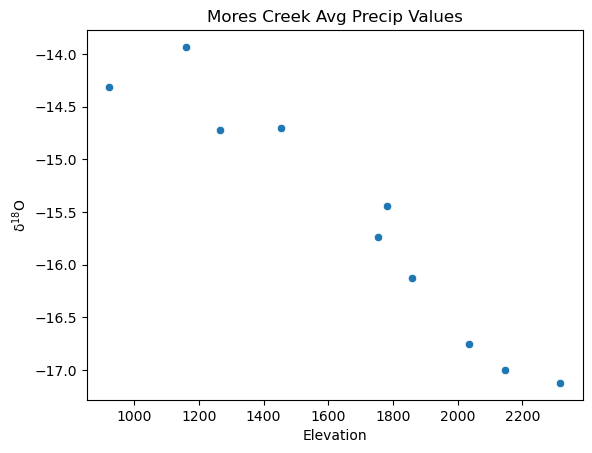

In [37]:
sns.scatterplot(data = et, x = 'elevation', y = 'D_18O_Precip').set(ylabel=r'$\mathregular{\delta^{18}}$O',
                                                                    xlabel='Elevation',
                                                                    title='Mores Creek Avg Precip Values');

Snow LinregressResult(slope=np.float64(-0.0003584537525924998), intercept=np.float64(-18.469241412269042), rvalue=np.float64(-0.26649506897763064), pvalue=np.float64(0.45670913276749747), stderr=np.float64(0.0004583552717356235), intercept_stderr=np.float64(0.7903627567357444))
Rain LinregressResult(slope=np.float64(-0.002130753344698083), intercept=np.float64(-8.683104327693218), rvalue=np.float64(-0.8470820024353568), pvalue=np.float64(0.001980654293909857), stderr=np.float64(0.0004726450569410558), intercept_stderr=np.float64(0.815003280636256))
r_squared_snow = 0.07101962178939211
Snow slope = -0.0003584537525924998 per km
r_squared_rain = 0.7175479188498939
Rain slope = -0.002130753344698083 per km


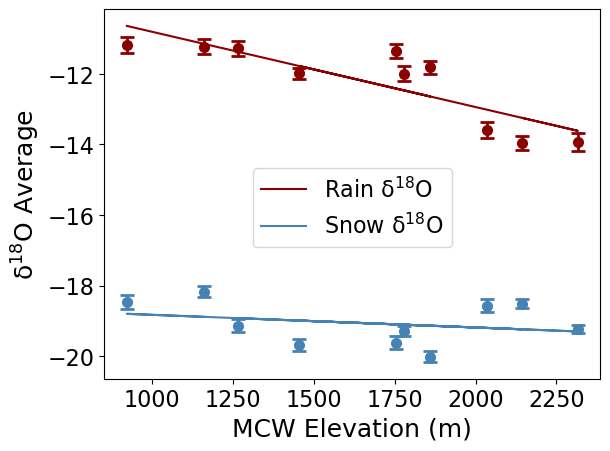

In [38]:
#rain
plt.errorbar(er['elevation'], er.index, yerr=er['D_18O_std_Rain'], fmt='o', color='darkred',markersize=7,capsize=5, capthick=2,elinewidth=2)
xx = er['elevation']
yy = er.index
a, c = np.polyfit(xx, yy, 1)
plt.plot(xx, a*xx+c,color='darkred',
         label=r'Rain $\mathregular{δ^{18}}$O')#= -0.002x - 9, $\mathregular{R^{2}}$ = 0.33, pv = 0.08')

#snow
plt.errorbar(em['elevation'], em.index, yerr=em['D_18O_std_Snow'], fmt='o', color='steelblue',markersize=7,capsize=5, capthick=2,elinewidth=2)
x = em['elevation']
y= em.index
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b,color='steelblue',
         label=r'Snow $\mathregular{δ^{18}}$O') # = -0.0004x - 18.5, $\mathregular{R^{2}}$ = 0.07, pv = 0.46')

plt.legend(loc='upper center',bbox_to_anchor=(.5, 0.6), fontsize=16)
plt.ylabel(r'$\mathregular{δ^{18}}$O Average',fontsize=18)
plt.xlabel('MCW Elevation (m)', fontsize=18)
plt.tick_params(axis='both', labelsize=16)

print('Snow',scipy.stats.linregress(x,y))
print('Rain',scipy.stats.linregress(xx,yy))

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
r_squared_snow = r_value**2
print('r_squared_snow =', r_squared_snow)
print('Snow slope =', slope,'per km')

slope, intercept, r_value_rain, p_value, std_err = scipy.stats.linregress(xx,yy)
r_squared_rain = r_value_rain**2
print('r_squared_rain =', r_squared_rain)
print('Rain slope =', slope,'per km')

Site Average LinregressResult(slope=np.float64(-0.0015014097507549458), intercept=np.float64(-14.686795857214314), rvalue=np.float64(-0.8384692400486438), pvalue=np.float64(0.002439125723123827), stderr=np.float64(0.0003450030272865673), intercept_stderr=np.float64(0.5949782913431685))
r_squared_avg sites = 0.7030306665077501
R2 =0.7, pvalue=0.002


np.float64(-1.5014097507549458)

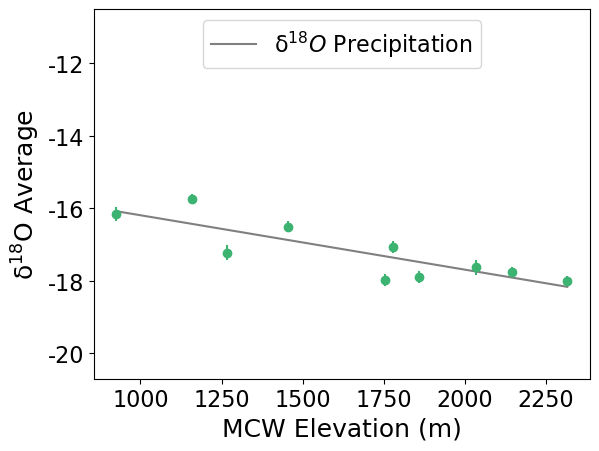

In [39]:
#average site D_18O Values for both rain and snow
yd = np.array([(-16.16),(-15.74),(-17.22),(-16.5),(-17.97),(-17.06),(-17.9),(-17.63),(-17.75),(-18.01)])
xd = np.array([926,1160,1266,1455,1755,1780,1860,2036,2145,2316]) #elevation
yerrd = np.array([0.2,0.15,0.2,0.15,0.17,0.17,0.17,0.2,0.14,0.15]) #se          
plt.errorbar(xd, yd, yerr=yerrd,fmt="o", color='mediumseagreen')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(xd, yd, 1)

#add linear regression line to scatterplot
plt.plot(xd, m*xd+b,color='gray',
          label=r'$\mathregular{δ^{18}}O$ Precipitation')   #= -14.7x – 0.0015' "\n" r'$\mathregular{R^{2}}$ = 0.7, pv = 0.00, lapserate = -1.5')
plt.legend(loc='upper center',bbox_to_anchor=(.5, 1), fontsize=16)
print('Site Average',linregress(xd,yd))
plt.xlabel('MCW Elevation (m)', fontsize=18)
plt.ylabel(r'$\mathregular{δ^{18}}$O Average', fontsize=18)
plt.tick_params(axis='both', labelsize=16)
y_ticks = np.array([-20, -18, -16, -14, -12])  # Define y-ticks with space below -20 and smaller space above -12
y_tick_labels = [str(tick) if tick != -10 else '' for tick in y_ticks]  # Replace -10 with an empty string
plt.yticks(ticks=y_ticks, labels=y_tick_labels)
plt.ylim(-20.7, -10.5)  # Set the y-axis limits to ensure the space above -12 and below -20

slope, intercept, r_value_avg, p_value, std_err = scipy.stats.linregress(xd,yd)
r_squared_avg = r_value_avg**2
print('r_squared_avg sites =', r_squared_avg)
print('R2 =0.7, pvalue=0.002')
lapserate = slope * 1000
lapserate

Snow: LinregressResult(slope=np.float64(-0.0003584537525924998), intercept=np.float64(-18.469241412269042), rvalue=np.float64(-0.26649506897763064), pvalue=np.float64(0.45670913276749747), stderr=np.float64(0.0004583552717356235), intercept_stderr=np.float64(0.7903627567357444))
Rain: LinregressResult(slope=np.float64(-0.002130753344698083), intercept=np.float64(-8.683104327693218), rvalue=np.float64(-0.8470820024353568), pvalue=np.float64(0.001980654293909857), stderr=np.float64(0.0004726450569410558), intercept_stderr=np.float64(0.815003280636256))
Combined: LinregressResult(slope=np.float64(-0.0015014097507549458), intercept=np.float64(-14.686795857214314), rvalue=np.float64(-0.8384692400486438), pvalue=np.float64(0.002439125723123827), stderr=np.float64(0.0003450030272865673), intercept_stderr=np.float64(0.5949782913431685))


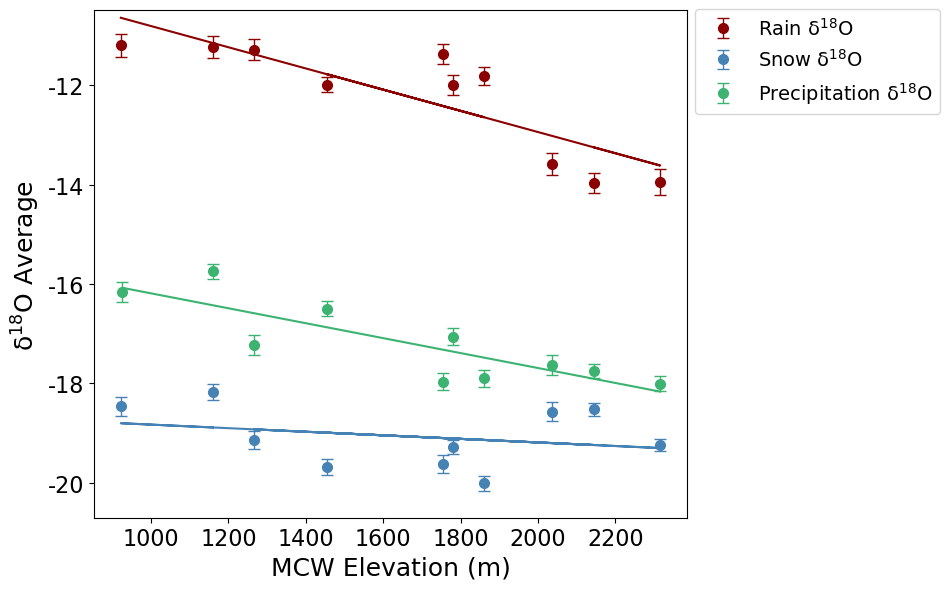

In [40]:
plt.figure(figsize=(10, 6))

# === RAIN ===
plt.errorbar(er['elevation'], er.index, yerr=er['D_18O_std_Rain'], fmt='o',
             color='darkred', markersize=7, capsize=4, capthick=1, elinewidth=1, label='Rain δ$^{18}$O')
xx = er['elevation']
yy = er.index
a, c = np.polyfit(xx, yy, 1)
plt.plot(xx, a * xx + c, color='darkred')

# === SNOW ===
plt.errorbar(em['elevation'], em.index, yerr=em['D_18O_std_Snow'], fmt='o',
             color='steelblue', markersize=7, capsize=4, capthick=1, elinewidth=1, label='Snow δ$^{18}$O')
x = em['elevation']
y = em.index
m, b = np.polyfit(x, y, 1)
plt.plot(x, m * x + b, color='steelblue')

# === COMBINED PRECIPITATION ===
yd = np.array([-16.16, -15.74, -17.22, -16.5, -17.97, -17.06, -17.9, -17.63, -17.75, -18.01])
xd = np.array([926, 1160, 1266, 1455, 1755, 1780, 1860, 2036, 2145, 2316])
yerrd = np.array([0.2, 0.15, 0.2, 0.15, 0.17, 0.17, 0.17, 0.2, 0.14, 0.15])

plt.errorbar(xd, yd, yerr=yerrd, fmt="o", color='mediumseagreen', markersize=7, capsize=4, capthick=1, elinewidth=1, label='Precipitation δ$^{18}$O')
m_comb, b_comb = np.polyfit(xd, yd, 1)
plt.plot(xd, m_comb * xd + b_comb, color='mediumseagreen')

# === LABELS, LEGEND, TICKS ===
plt.xlabel('MCW Elevation (m)', fontsize=18)
plt.ylabel('δ$^{18}$O Average', fontsize=18)
plt.tick_params(axis='both', labelsize=16)

plt.legend(loc='upper center', bbox_to_anchor=(1.22, 1.022), fontsize=14)

# Custom y-axis ticks
y_ticks = np.array([-20, -18, -16, -14, -12])
y_tick_labels = [str(tick) for tick in y_ticks]
plt.yticks(ticks=y_ticks, labels=y_tick_labels)
plt.ylim(-20.7, -10.5)

plt.tight_layout()

# === Print stats ===
print('Snow:', scipy.stats.linregress(x, y))
print('Rain:', scipy.stats.linregress(xx, yy))
print('Combined:', scipy.stats.linregress(xd, yd))